## **Cleaning Weather datasets**

In [76]:
import pandas as pd
from pygame.transform import threshold

In [77]:

weather_data_csv = 'datasets/weatherAUS.csv'

weather_data = pd.read_csv(weather_data_csv)

print(weather_data.columns.tolist())

weather_data.drop(columns=['Evaporation',
                           'WindGustDir',
                           'WindGustSpeed',
                           'WindDir9am',
                           'WindDir3pm',
                           'Cloud9am',
                           'Cloud3pm',
                           'Temp9am',
                           'Temp3pm',
                           'RainToday',
                           'RainTomorrow'], inplace=True)

print(weather_data.head())

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
         Date Location  MinTemp  MaxTemp  Rainfall  Sunshine  WindSpeed9am  \
0  2008-12-01   Albury     13.4     22.9       0.6       NaN          20.0   
1  2008-12-02   Albury      7.4     25.1       0.0       NaN           4.0   
2  2008-12-03   Albury     12.9     25.7       0.0       NaN          19.0   
3  2008-12-04   Albury      9.2     28.0       0.0       NaN          11.0   
4  2008-12-05   Albury     17.5     32.3       1.0       NaN           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  
0          24.0         71.0         22.0       1007.7       1007.1  
1          22.0         44.0         25.0       1010.6       1007.8  
2          2

In [78]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,20.0,24.0,71.0,22.0,1007.7,1007.1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,4.0,22.0,44.0,25.0,1010.6,1007.8
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,19.0,26.0,38.0,30.0,1007.6,1008.7
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,11.0,9.0,45.0,16.0,1017.6,1012.8
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,7.0,20.0,82.0,33.0,1010.8,1006.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,13.0,11.0,51.0,24.0,1024.6,1020.3
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,13.0,9.0,56.0,21.0,1023.5,1019.1
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,9.0,9.0,53.0,24.0,1021.0,1016.8
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,13.0,7.0,51.0,24.0,1019.4,1016.5


### **Reading the flu file**

In [79]:
flu_path = 'datasets/people_per_date.csv'

flu_data = pd.read_csv(flu_path)

# Step 1: Convert weather data 'Date' to datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Step 2: Create 'Year_Week' column for both daily weather and weekly flu data
weather_data['Year_Week'] = weather_data['Date'].dt.strftime('%Y-%U')
flu_data['Week Ending (Friday)'] = pd.to_datetime(flu_data['Week Ending (Friday)'])
flu_data['Year_Week'] = flu_data['Week Ending (Friday)'].dt.strftime('%Y-%U')

flu_data['Daily_Flu_Cases'] = flu_data['Number of Sick People'] / 7

# Step 3: Merge the flu data onto the daily weather data (assigning the weekly flu cases to each day of the week)
merged_data = pd.merge(weather_data, flu_data[['Year_Week', 'Daily_Flu_Cases']], on='Year_Week', how='left')

# Display the merged dataset to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Merged Daily Weather with Weekly Flu Data", dataframe=merged_data)

merged_data.head(10000)

# Now 'merged_data' contains daily weather with weekly flu cases assigned to each day.

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Year_Week,Daily_Flu_Cases
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,20.0,24.0,71.0,22.0,1007.7,1007.1,2008-48,8.428571
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,4.0,22.0,44.0,25.0,1010.6,1007.8,2008-48,8.428571
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,19.0,26.0,38.0,30.0,1007.6,1008.7,2008-48,8.428571
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,11.0,9.0,45.0,16.0,1017.6,1012.8,2008-48,8.428571
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,7.0,20.0,82.0,33.0,1010.8,1006.0,2008-48,8.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2011-08-26,CoffsHarbour,9.2,21.7,0.0,10.8,4.0,11.0,71.0,51.0,1025.4,1022.6,2011-34,225.142857
9996,2011-08-27,CoffsHarbour,12.0,17.4,0.2,0.7,13.0,20.0,83.0,96.0,1022.6,1018.2,2011-34,225.142857
9997,2011-08-28,CoffsHarbour,12.2,20.9,25.0,10.7,17.0,15.0,70.0,62.0,1019.7,1017.2,2011-35,178.857143
9998,2011-08-29,CoffsHarbour,11.1,22.7,0.0,9.6,6.0,9.0,54.0,79.0,1018.6,1016.0,2011-35,178.857143


## **TRAINING**

In [80]:
from sklearn.model_selection import train_test_split

threshold_value = 256

# Assuming 'merged_data' contains both weather and flu data, merged on a weekly basis
X = merged_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']]  # Weather features
y = merged_data['Daily_Flu_Cases']  # Target variable (flu cases)

# If you want to classify flu outbreaks (0 = no outbreak, 1 = outbreak)
y_class = (y > threshold_value).astype(int)  # Convert flu cases into binary for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# If you want to get the probability of a flu outbreak:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (flu outbreak)


Accuracy: 0.8399560016499381
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     24670
           1       0.38      0.09      0.14      4422

    accuracy                           0.84     29092
   macro avg       0.62      0.53      0.53     29092
weighted avg       0.78      0.84      0.79     29092



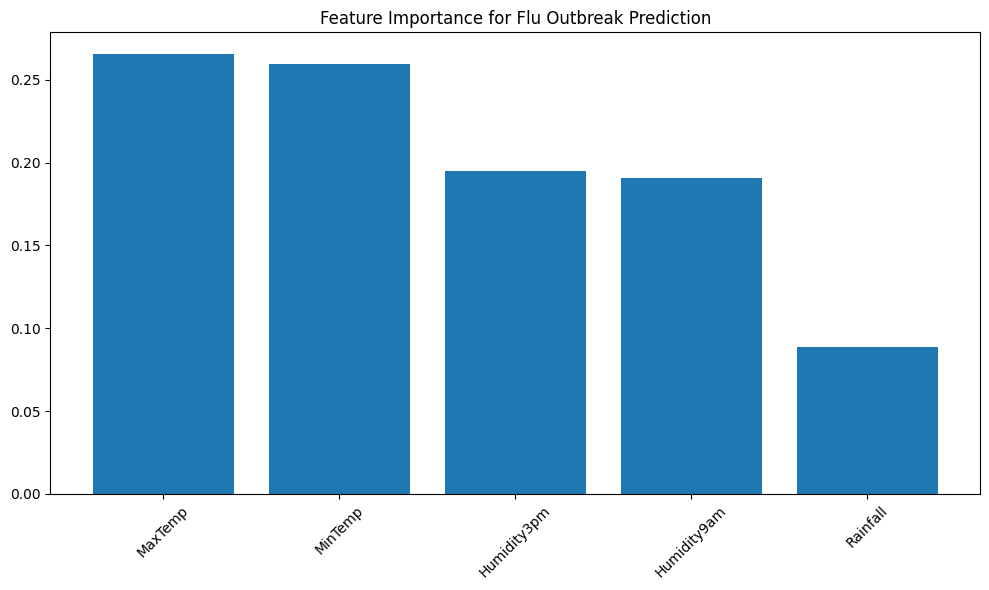

In [82]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming the RandomForestClassifier 'model' is already trained
# Feature importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance for Flu Outbreak Prediction")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

# Feature names (X column names)
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']

# Call the function to plot feature importance
plot_feature_importance(model, features)


In [83]:
# Example: Weighted average values based on feature importance
import numpy as np

# Assuming feature importance is extracted from the trained RandomForest model
feature_importances = model.feature_importances_
feature_names = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']

# Normalized feature importance to create weights
weights = feature_importances / feature_importances.sum()

# Historical data (could be from averages or recent data)
historical_data = {
    'MinTemp': 15.5,
    'MaxTemp': 25.2,
    'Rainfall': 5.3,
    'Humidity9am': 85,
    'Humidity3pm': 60
}

# Calculate weighted values
weighted_values = {feature: historical_data[feature] * weight for feature, weight in zip(feature_names, weights)}

print("Weighted feature values for reasonable prediction:", weighted_values)


Weighted feature values for reasonable prediction: {'MinTemp': 4.022213067864533, 'MaxTemp': 6.688194277899517, 'Rainfall': 0.4712038126828495, 'Humidity9am': 16.234474700404476, 'Humidity3pm': 11.711858887493708}


In [84]:
# Assume 'model' is already trained
def flu_calculator(min_temp, max_temp, rainfall, humidity_9am, humidity_3pm, threshold=0.5):
    # Prepare the input features in the same format as training data
    input_data = pd.DataFrame({
        'MinTemp': [min_temp],
        'MaxTemp': [max_temp],
        'Rainfall': [rainfall],
        'Humidity9am': [humidity_9am],
        'Humidity3pm': [humidity_3pm]
    })
    
    # Predict the probability of flu outbreak
    flu_outbreak_prob = model.predict_proba(input_data)[:, 1]  # Probability of the positive class (flu outbreak)
    
    # Return 1 (flu outbreak) if probability >= threshold, else 0 (no flu outbreak)
    return int(flu_outbreak_prob[0] >= threshold)

# Example usage:
min_temp = 15.5
max_temp = 25.2
rainfall = 5.3
humidity_9am = 85
humidity_3pm = 60

# Get the predicted set value (1 for flu outbreak, 0 for no flu outbreak)
flu_outbreak = flu_calculator(min_temp, max_temp, rainfall, humidity_9am, humidity_3pm)
print(f"Flu outbreak prediction (1 = outbreak, 0 = no outbreak): {flu_outbreak}")

Flu outbreak prediction (1 = outbreak, 0 = no outbreak): 0


In [85]:
for i, prob in enumerate(y_pred_proba):
    print(f"Test sample {i+1}: Probability of flu outbreak = {prob*100:.2f}%")

Test sample 1: Probability of flu outbreak = 13.00%
Test sample 2: Probability of flu outbreak = 4.00%
Test sample 3: Probability of flu outbreak = 4.00%
Test sample 4: Probability of flu outbreak = 5.00%
Test sample 5: Probability of flu outbreak = 24.00%
Test sample 6: Probability of flu outbreak = 35.00%
Test sample 7: Probability of flu outbreak = 0.00%
Test sample 8: Probability of flu outbreak = 3.00%
Test sample 9: Probability of flu outbreak = 8.00%
Test sample 10: Probability of flu outbreak = 7.00%
Test sample 11: Probability of flu outbreak = 7.00%
Test sample 12: Probability of flu outbreak = 37.00%
Test sample 13: Probability of flu outbreak = 16.00%
Test sample 14: Probability of flu outbreak = 36.00%
Test sample 15: Probability of flu outbreak = 23.00%
Test sample 16: Probability of flu outbreak = 19.00%
Test sample 17: Probability of flu outbreak = 27.00%
Test sample 18: Probability of flu outbreak = 13.00%
Test sample 19: Probability of flu outbreak = 46.00%
Test sampl

In [86]:
# Step 1: Prepare the weather data for the specific date
# Assuming weather_data is your full weather DataFrame, filter for the given date
specific_date = '2009-11-4'  # Example date
weather_data['Date'] = pd.to_datetime(weather_data['Date'])  # Ensure Date is in datetime format

# Extract the weather features for the specific date
weather_for_date = weather_data[weather_data['Date'] == specific_date][['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']]

# Step 2: Make sure the features are in the right format (same as used for training)
# Check if weather_for_date has exactly the same structure as X_train (used in training the model)
if not weather_for_date.empty:
    # Step 3: Use the trained model to predict the probability of flu outbreak for the given date
    flu_outbreak_prob = model.predict_proba(weather_for_date)[:, 1]  # Probability of flu outbreak (class 1)
    
    # Step 4: Display the prediction result
    print(f"Probability of flu outbreak on {specific_date}: {flu_outbreak_prob[0]*100:.2f}%")
else:
    print(f"No weather data available for {specific_date}.")

Probability of flu outbreak on 2009-11-4: 6.00%
